# Домашнее задание "Теория оптимизации".

## Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

In [51]:
# Зададим функцию :
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# задаем пределы изменения переменных 
bounds = [(-10, 10), (-10, 10)]

# Для функции Ackley и заданных границ переменных применим функцию differential_evolution с параматерами по 
# умолчанию и seed=42
result0 = differential_evolution(ackley, bounds, seed=42)
result0

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Итак, функция вернула результат:<br>
Оптимум функции равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Оптимизация завершена успешно<br>
Количество оценок целевых функций **2793**<br>
Количество выполненных итераций **90** <br>
Успех и правда успех. И вообще скоро Новый год! <br>
Оптимум функции достигается в точке **[0, 0]**<br>

In [52]:

# Теперь изменим параметр strategy. По умолчанию он strategy='best1bin'. Укажем, например, strategy='rand2exp'
result1 = differential_evolution(ackley, bounds, strategy='rand2exp', seed=42)
result1

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 10323
     nit: 341
 success: True
       x: array([0., 0.])

Здесь сразу оговорюсь: все результаты экспериментов буду сравнивать с result0 - резултатом для параметров по умолчанию<br>
Оптимум функции так же равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Количество оценок целевых функций увеличелось до **10323**<br>
Количество выполненных итераций увеличелось до **341** <br>
Оптимум функции так же достигается в точке **[0, 0]**<br>

In [54]:
# Теперь изменим параметр popsize - множитель для определения общей численности популяции. 
# По умолчанию он popsize=15. Укажем, например, popsize=75
result2 = differential_evolution(ackley, bounds, popsize=75, seed=42)
result2

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 15213
     nit: 100
 success: True
       x: array([0., 0.])

Оптимум функции так же равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Количество оценок целевых функций увеличелось до **15213**<br>
Количество выполненных итераций увеличелось до **100** <br>
Оптимум функции так же достигается в точке **[0, 0]**<br>

In [167]:
# Укажем, например, popsize=3
result2 = differential_evolution(ackley, bounds, popsize=3, seed=42)
result2

     fun: 0.0006331649446029708
 message: 'Optimization terminated successfully.'
    nfev: 372
     nit: 29
 success: True
       x: array([-2.23261827e-04,  7.50128262e-06])

Оптимум функции уже равен **0.0006331649446029708** - точность снизилась<br>
Количество оценок целевых функций сократилось до **372**<br>
Количество выполненных итераций сократилось до **29** <br>
Оптимум функции достигается в точке **[-2.23261827e-04,  7.50128262e-06]** - тоже снизилась точность<br>

In [119]:
# Теперь изменим параметр tol - относительный допуск для сходимости. По умолчанию он tol=0.01. 
# Укажем, например, tol=0.0005
result3 = differential_evolution(ackley, bounds, tol=0.0005, seed=42)
result3

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

Оптимум функции равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Количество оценок целевых функций **2793**<br>
Количество выполненных итераций **90** <br>
Оптимум функции достигается в точке **[0, 0]**<br>
Уменьшение параметра tol в 20 раз не повлияло на результат - такой же как у **result0**

In [71]:
# Укажем, например, tol=0.32
result3 = differential_evolution(ackley, bounds, tol=0.32, seed=42)
result3

     fun: 2.5799275570298943
     jac: array([ 1.42108547e-06, -7.10542732e-07])
 message: 'Optimization terminated successfully.'
    nfev: 114
     nit: 1
 success: True
       x: array([2.32100283e-08, 9.52166531e-01])

Если постепенно увеличивать параметр tol, то по началу так же результат не меняется, но при каком-то достаточно большом значении начинает страдать точность получаемых результатов. Например, при tol=0.31 результат такой же, как у **result0**, а вот при tol=0,32 (и других более высоких значениях) выполняется всего одна итерация и значение оптимума функции уже не близко к нулю. 

In [74]:
# Теперь изменим параметр mutation - постоянную мутации. По умолчанию mutation=(0.5, 1) - задается в виде кортежа с min и 
# max возможными значениями постоянной мутации. 
# Укажем, например, mutation=(0.1, 0.2)
result4 = differential_evolution(ackley, bounds, mutation=(0.1, 0.2), seed=42)
result4

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 933
     nit: 28
 success: True
       x: array([0., 0.])

Оптимум функции так же равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Количество оценок целевых функций сократилось до **933**<br>
Количество выполненных итераций сократилось до **28** <br>
Оптимум функции так же достигается в точке **[0, 0]**<br>

In [75]:
# Укажем, например, mutation=(1.9, 1.99)
result4 = differential_evolution(ackley, bounds, mutation=(1.9, 1.99), seed=42)
result4

     fun: 2.0130344058344463e-08
     jac: array([ 0.01639329, -0.04237997])
 message: 'Optimization terminated successfully.'
    nfev: 3759
     nit: 122
 success: True
       x: array([-4.95858089e-09, -5.10551732e-09])

Здесь уже точность немного пострадала, хотя тоже в качестве решений получены значения близкие к нулю, но не равные нулю <br>
При этом <br>
Количество оценок целевых функций увеличелось до **3759**<br>
Количество выполненных итераций увеличелось до **122** <br>

In [76]:
# Теперь изменим параметр recombination - константа рекомбинации. По умолчанию recombination=0.7. 
# Укажем, например, recombination=0.99
result5 = differential_evolution(ackley, bounds, recombination=0.99, seed=42)
result5

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2493
     nit: 80
 success: True
       x: array([0., 0.])

In [77]:
# Укажем, например, recombination=0.01
result5 = differential_evolution(ackley, bounds, recombination=0.01, seed=42)
result5

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3573
     nit: 116
 success: True
       x: array([0., 0.])

В обоих случаях найдены верные решения. При увеличении значения константы рекомбинации количество целевых функций и количество выполненных итераций сокращается, а при уменьшении - увеличивается.

In [78]:
# Теперь изменим параметр updating. По умолчанию updating='immediate'. 
# Он может принимать второе значение updating='deferred'
result6 = differential_evolution(ackley, bounds, updating='deferred', seed=42)
result6

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])

Оптимум функции так же равен **4.440892098500626e-16** - очень маленькое значение, которое можно принять равным **0** <br>
Количество оценок целевых функций увеличелось до **3753**<br>
Количество выполненных итераций увеличелось до **122** <br>
Оптимум функции так же достигается в точке **[0, 0]**<br>

***

Постройте графики количества итераций оптимизации функции ackley от значения параметра.




1) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***strategy***

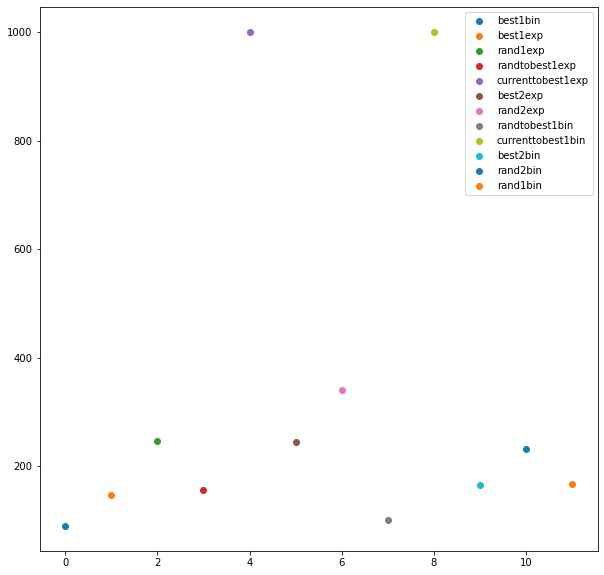

In [109]:
strategy_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp',
                'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

# В данном случае не вижу смысла соединять точки линией, т.к. мы можем в любом порядке подставлять значения праметра
# strategy. Просто изобразим точки на графике, чтобы наглядно увидеть разброс возможных значений.
plt.figure(figsize=(10, 10))
for x, el in enumerate(strategy_list):
    plt.plot(x, differential_evolution(ackley, bounds, strategy=el, seed=42).nit, 'o', label=el)

plt.legend()
plt.show()

2) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***popsize***

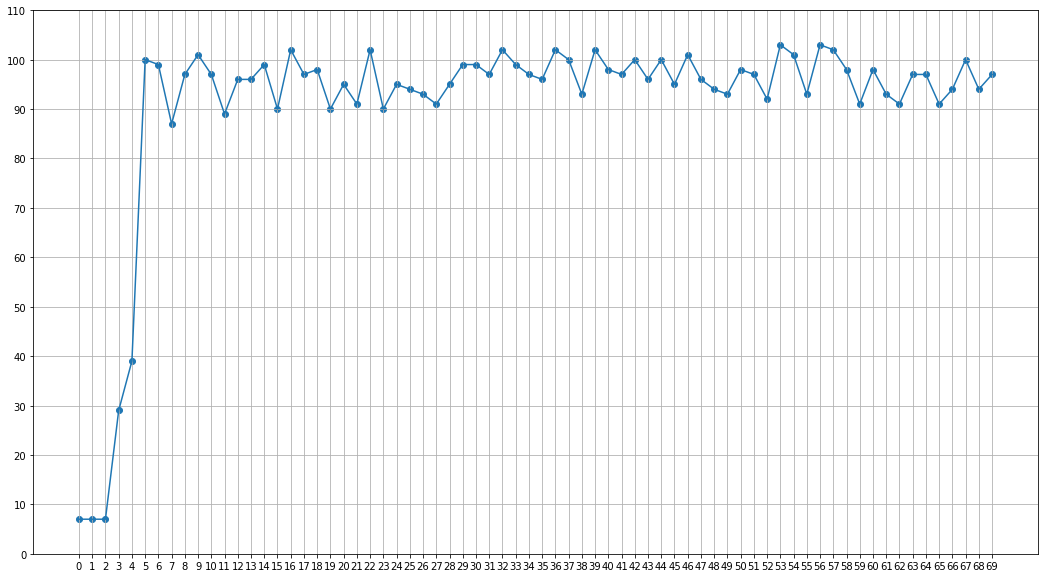

In [116]:
# Множитель для определения общей численности популяции имеет класс int, т.е. может принимать целочисленные значения
X = []
Y = []

for i in range(70):
    X.append(i)
    Y.append(differential_evolution(ackley, bounds, popsize=i, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.xticks(np.arange(0, 70, step=1))
plt.yticks(np.arange(0, 111, step=10))
plt.show()

In [117]:
# Т.е. резкий скачок в количестве итераций происходит при значениях popsize от 3 до 5. Потом при уыеличении popsize 
# количество итераций в основном колеблется в диапазоне 90 - 110.

3) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***tol***

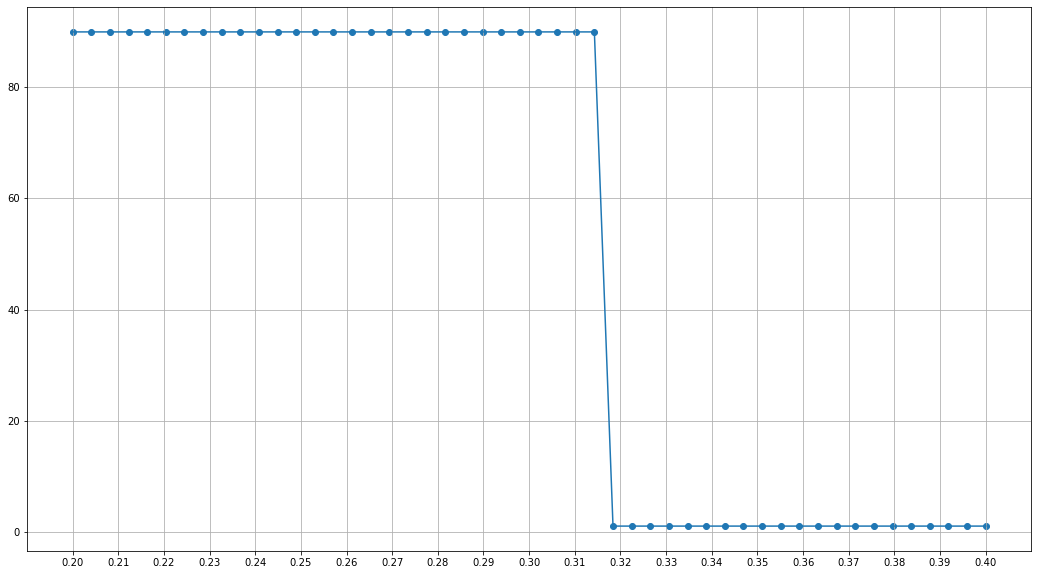

In [130]:
# Т.к. ранее уже было замечено, что количество итераций меняятся один раз в районе tol=0.31, то зададим диапазон значений 
X=np.linspace(0.2, 0.4)
Y = []
for el in X:
    Y.append(differential_evolution(ackley, bounds, tol=el, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.xticks(np.arange(0.2, 0.41, step=0.01))
plt.show()

4) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***mutation***

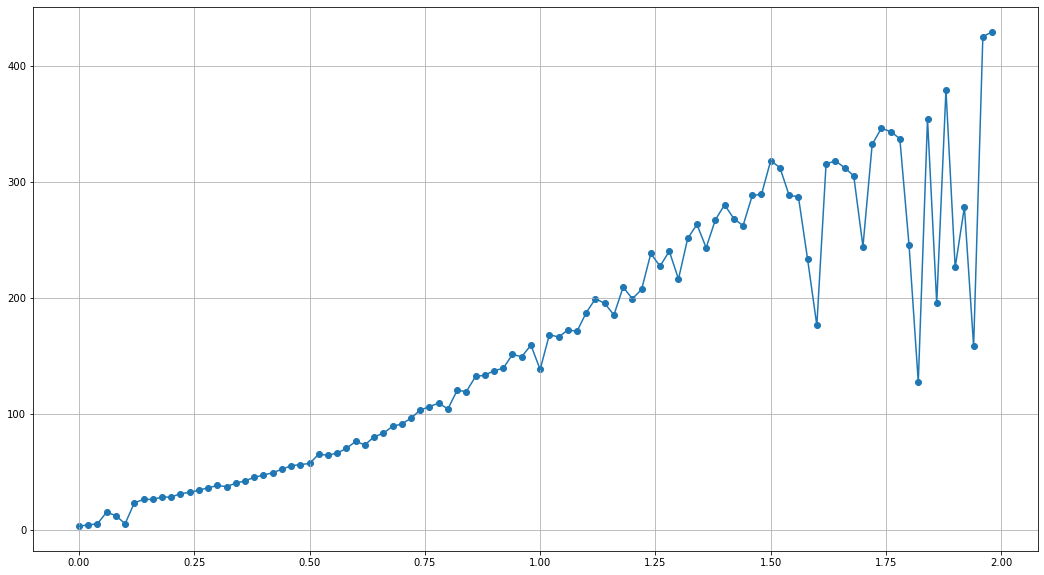

In [138]:
# Если я правильно понял документацию, то параметр mutation может принимать значения из диапазона  [0, 2].
X=np.linspace(0, 2, num=100, endpoint=False)
Y = []
for el in X:
    Y.append(differential_evolution(ackley, bounds, mutation=el, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.show()

In [139]:
# т.е. при значениях mutation в диапазоне (0, 1.5) количество итераций растет достаточно гладко, а при mutation > 1.5
# наблюдается разброс возможных значений количества итераций

5) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***recombination***

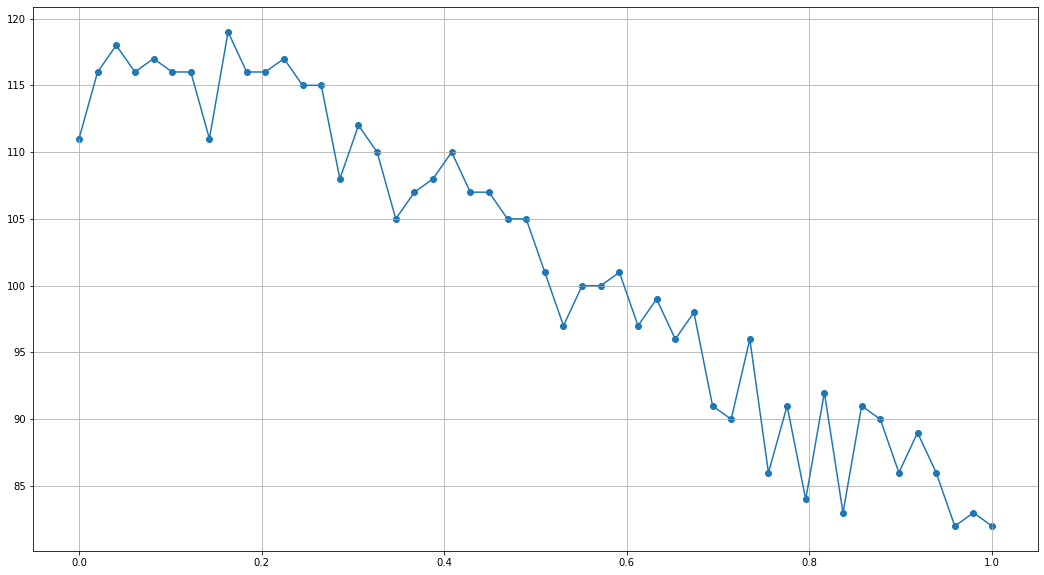

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [152]:
# Если я правильно понял документацию, то параметр recombination может принимать значения из диапазона  [0, 1].
X=np.linspace(0, 1)
Y = []
for el in X:
    Y.append(differential_evolution(ackley, bounds, recombination=el, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.show()
X

6) График зависимости количества итераций оптимизации функции ackley  от значений параметра ***updating***

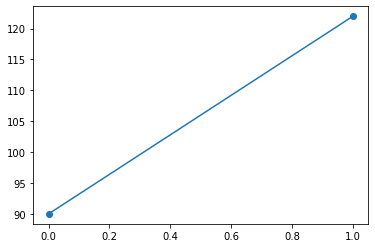

In [142]:
# У этого параметра всего два значения. Причем ранее мы уже выяснили, что при updating='immediate' количество итераций =90,
# а при updating='deferred' количество итераций =122
X= []
Y =[]
updating_list = ['immediate','deferred']
for i, el in enumerate(updating_list):
    X.append(i)
    Y.append(differential_evolution(ackley, bounds, updating=el, seed=42).nit)

plt.plot(X, Y)
plt.scatter(X,Y)
plt.show()


## Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

Тут вопрос: нужно вручную подбирать значения параметров, или существет возможность каким-то образом автоматизировать эту задачу? <br>
Попробую вручную.<br>
Предполагаю, что нужно найти параметны, удовлетворяющие условию поставленной задачи, и при этом не должна пострадать точность найденных решений. т.е. так же должны быть <br>
Оптимум функции равен **4.440892098500626e-16** <br>
Оптимум функции так же достигается в точке **[0, 0]**<br>
<br>
Думаю можно учитывать информацию, ранее полученную при построении графиков. Например из первого графика видно, что наименьшее количество итераций при strategy='best1bin', а из последнего графика - что при updating='immediate'. Эти значения параметров, кстати, заданы по умолчанию. Укажем их и посмотрим результат

In [151]:
differential_evolution(ackley, bounds, strategy='best1bin', updating='immediate', seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [154]:
# Теперь посмотрим на график для параметра recombination. Минимальное значение на графике при recombination=1
# При задании такого значения сокращается количество итераций и не страдает точность расчетов.
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1, updating='immediate', seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2553
     nit: 82
 success: True
       x: array([0., 0.])

In [173]:
# Теперь разберемся с параметром popsize. Т.к. он принимает только целочисленные значения, то можно перебрать 
# значения параметра для поиска решения
nit_min = 500  # Количество итераций на графиках не превышало этого значения. Пусть будет в качестве начального для min
for i in range(70):
    fun = differential_evolution(ackley, bounds, strategy='best1bin', recombination=1, 
                                 updating='immediate', popsize=i, seed=42).fun
    x1 = differential_evolution(ackley, bounds, strategy='best1bin', recombination=1, 
                                updating='immediate', popsize=i, seed=42).x
    nit = differential_evolution(ackley, bounds, strategy='best1bin', recombination=1, 
                                 updating='immediate', popsize=i, seed=42).nit
    if (fun == 4.440892098500626e-16 and x1[0] == 0 and x1[1] ==0) :
        if nit < nit_min: 
            nit_min = nit
            i_min = i
print(f'Минимальное количество итераций {nit_min} при popsize={i_min}')
# Вот здесь для меня неожиданный результат. Я думал выдаст решение popsize=7, как это было на графике. Но видимо 
# на результат повлиляло  recombination=1. Возможно надо было проверить больше 70 значений, но уж очень долго считает.

Минимальное количество итераций 73 при popsize=49


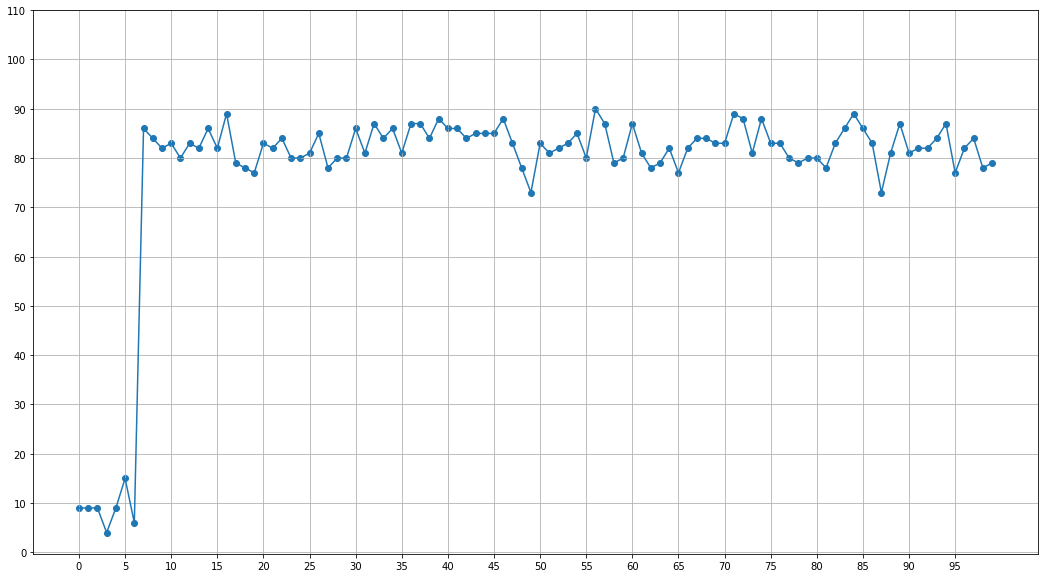

In [179]:
# на всякий случай, чтобы убедиться наглядно, изобразим график зависимости от значений параметра popsize
X = []
Y = []

for i in range(100):
    X.append(i)
    Y.append(differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=i, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 111, step=10))
plt.show()
# По графику видно, что еще при popsize=87 тоже намблюдается минимум

In [180]:
# Проверим результат при popsize=87
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1, 
                                 updating='immediate', popsize=87, seed=42)

# Так же количество итераций равно 73.

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 12939
     nit: 73
 success: True
       x: array([0., 0.])

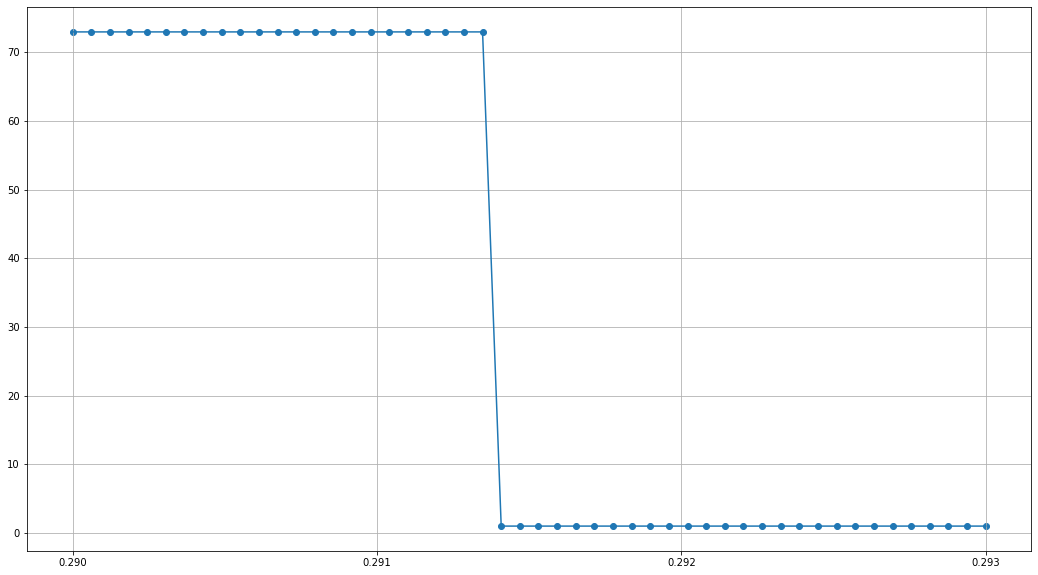

In [184]:
# Осталось разобраться с двумя параметрами: tol и mutation. С ними сложнее, т.к. они вещественного типа
# Еще раз построим графики зависимости от значений этих параметров, но с уже найденнными другими параметрами
X=np.linspace(0.29, 0.293)
Y = []
for el in X:
    Y.append(differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=el, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.xticks(np.arange(0.29, 0.2931, step=0.001))
plt.show()

In [186]:
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=0.291, seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7315
     nit: 73
 success: True
       x: array([0., 0.])

In [189]:
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=0.292, seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7315
     nit: 73
 success: True
       x: array([0., 0.])

In [190]:
# Где-то при значении параметра 0.291 < tol < 0.292 происходит ухудшение точности расчетов и сокращение итераций до 1
# т.е. по идее параметр tol может принимать любое значение от 0 до какой-то "переломной" точки после 0.291.
# Возьмем тогда значение по умолчанию tol=0.01
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=0.01, seed=42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7315
     nit: 73
 success: True
       x: array([0., 0.])

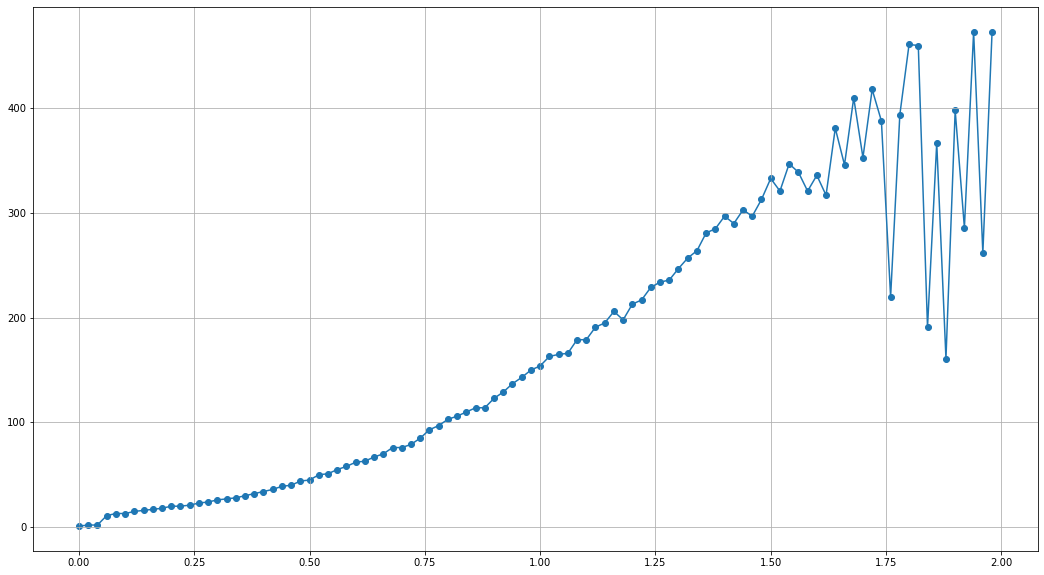

In [191]:
# Построим график для mutation:
X=np.linspace(0, 2, num=100, endpoint=False)
Y = []
for el in X:
    Y.append(differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=0.01, mutation=el, seed=42).nit)
    
plt.figure(figsize=(18, 10))
plt.grid(True)
plt.plot(X, Y)
plt.scatter(X,Y)
plt.show()

In [253]:
# Вот здесь честно уже лень было писать какой-то цикл. Тем более в рекомендованных материалах к заданию под звездочкой
# было написано "(*) При выполнении домашнего задания достаточно в ручную поэкспериментировать с параметрами" 
# Поэтому я в ручную за несколько шагов нашел, что минимальное количество итераций равное 11 получается при
# значении параметра mutation близкого к 0.06, а точнее  0.0522596 <= mutation <= 065001 
# При меньших значениях будет страдать точность решений, а при больших - будет увеличиваться число итераций.

# Для удобства возьмем mutation=0.06
differential_evolution(ackley, bounds, strategy='best1bin', recombination=1,
                                    updating='immediate', popsize=49, tol=0.01, mutation=0.06, seed=42)
# Таким образом, эти значения параметров и есть искомое множество параметров (одно из многих), которые требуют 
# минимального количества итераций. В моем случае минимальное количество итераций равно 11

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1239
     nit: 11
 success: True
       x: array([0., 0.])